Chapter 33
# 一阶贝塞尔曲线原理
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [2]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = True
p["xtick.minor.visible"] = True
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

In [3]:
def lerp(P_a, P_b, t_array):
    
    P_out = [P_a * t_idx + P_b * (1 - t_idx) for t_idx in t_array]
    P_out = np.array(P_out)
    
    return P_out


In [4]:
P_0 = np.array([-4, 4])
P_1 = np.array([4, -4])

delta_t = 1/16
t_array = np.linspace(delta_t,1,int(1/delta_t - 1), endpoint = False)
t_array_fine = np.linspace(0, 1, 101, endpoint = True)

B_array = lerp(P_0, P_1, t_array)
B_array_fine = lerp(P_0, P_1, t_array_fine)

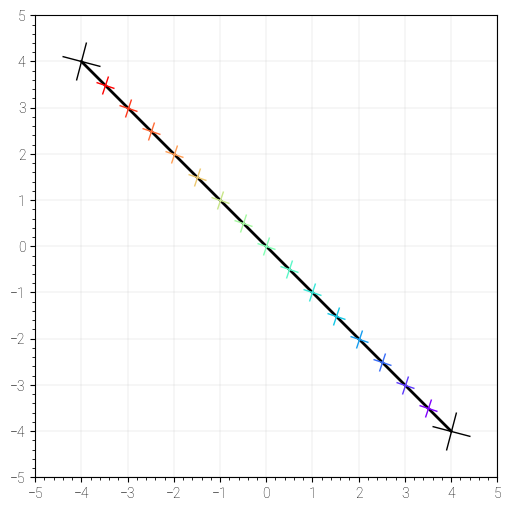

In [5]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

num = len(t_array)
colors = plt.cm.rainbow(np.linspace(0,1,num, endpoint = True))

t = mpl.markers.MarkerStyle(marker='x')
t._transform = t.get_transform().rotate_deg(30)

plt.plot([P_0[0],P_1[0]],
         [P_0[1],P_1[1]],
         color = 'k', 
         marker = t, ms = 20, lw = 0.5)

for i in range(num):
    
    plt.plot(B_array[i,0],B_array[i,1], 
             marker = t, c = colors[i], 
             ms = 10, zorder = 1e5)


plt.plot(B_array_fine[:,0],B_array_fine[:,1],c = 'k', lw = 2)
# plt.plot(([i for (i,j) in P_0_1], [i for (i,j) in P_1_2]),
#          ([j for (i,j) in P_0_1], [j for (i,j) in P_1_2]),
#          c=[0.6,0.6,0.6], alpha = 0.5)

ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-5, 5), ax.set_ylim(-5, 5)
ax.set_xticks(np.arange(-5,6))
ax.set_yticks(np.arange(-5,6))
ax.grid(c = '0.8', lw = 0.25)

fig.savefig('Figures/一阶贝塞尔曲线原理.svg', format='svg')

plt.show()